Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


100%|██████████| 170498071/170498071 [00:13<00:00, 12879169.72it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


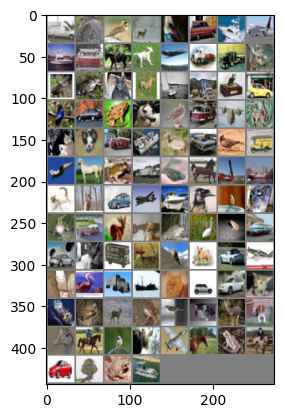

truck bird  bird  deer  bird  car   ship  plane ship  truck horse dog   plane truck truck deer  deer  frog  cat   horse ship  truck cat   car   bird  car   frog  horse bird  truck plane frog  cat   dog   truck ship  deer  car   bird  truck plane horse frog  truck frog  horse truck ship  cat   deer  car   plane ship  bird  bird  cat   frog  truck deer  dog   frog  bird  frog  plane car   cat   truck deer  bird  dog   car   plane cat   bird  truck ship  cat   car   car   cat   ship  frog  deer  frog  bird  cat   deer  dog   bird  horse bird  deer  plane horse frog  horse car   bird  frog  ship 
[1,   100] loss: 2.304
[1,   200] loss: 2.304
[1,   300] loss: 2.303
[1,   400] loss: 2.301
[1,   500] loss: 2.299
[2,   100] loss: 2.297
[2,   200] loss: 2.294
[2,   300] loss: 2.288
[2,   400] loss: 2.280
[2,   500] loss: 2.263
[3,   100] loss: 2.232
[3,   200] loss: 2.177
[3,   300] loss: 2.129
[3,   400] loss: 2.068
[3,   500] loss: 2.030
[4,   100] loss: 1.991
[4,   200] loss: 1.966
[4,   300

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #三通道输入，十输出，2*2池化，2卷积3fc
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
#定义神经网络
device='cuda:0'
net = Net().to(device)  # Move the model to GPU
net.zero_grad()  # zeroes the gradient buffers of all parameters
print(net)

#定义损失函数
criterion = nn.CrossEntropyLoss().to(device)

#定义更新函数（SGD）
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#测试输入集{input,target}
#input = torch.randn(1, 1, 32, 32).to(device)  # Move input tensor to GPU
#target = torch.randn(10).to(device)  # a dummy target, for example
#target = target.view(1, -1)  # make it the same shape as output


#前向传播并计算损失
#output = net(input)
#print(output)
#loss = criterion(output, target)
#print(loss)

#清除优化器累计梯度更新
#optimizer.zero_grad()   # zero the gradient buffers

#更新模型
#loss.backward()   #后向传播计算梯度
#optimizer.step()    # 更新模型参数

#CIFAR-10数据集包含10个类别，每个类别有6000张32x32的彩色图像。
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 100 #单次迭代批次大小
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


#载入训练集
#特征，标签 特征为图片集，标签为各图片集对应class在classes中的位置
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#训练神经网络
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.to(device)
        labels=labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0
print('Finished Training')

#保存训练好的神经网络模型
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
#载入测试集
dataiter = iter(testloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#加载模型
net = Net().to(device)
net.load_state_dict(torch.load(PATH))
#推理测试
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images=images.to(device)
        labels=labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1) #data中每个结果的最大值,data中每个结果的最大值索引
        total += labels.size(0) #本批次测试数量
        correct += (predicted == labels).sum().item() #本批次正确数量

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')